In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
df = pd.read_csv('climate_change.csv', parse_dates=['date'], index_col=['date'])

In [34]:
df.index

DatetimeIndex(['1958-03-06', '1958-04-06', '1958-05-06', '1958-06-06',
               '1958-07-06', '1958-08-06', '1958-09-06', '1958-10-06',
               '1958-11-06', '1958-12-06',
               ...
               '2016-03-06', '2016-04-06', '2016-05-06', '2016-06-06',
               '2016-07-06', '2016-08-06', '2016-09-06', '2016-10-06',
               '2016-11-06', '2016-12-06'],
              dtype='datetime64[ns]', name='date', length=706, freq=None)

In [107]:
df.head(5)

,co2,relative_temp
date,,
1958-03-06,315.71,0.10
1958-04-06,317.45,0.01
1958-05-06,317.50,0.08
1958-06-06,NaN,-0.05
1958-07-06,315.86,0.06


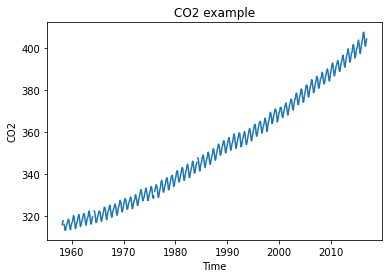

In [35]:
fig, ax = plt.subplots()
ax.plot(df.index, df.co2)
ax.set_xlabel('Time')
ax.set_ylabel('CO2')
ax.set_title('CO2 example')
plt.show()

In [36]:
sixties = df['1960-01-01':'1969-12-31'] #if date is not set as index, it will not slice

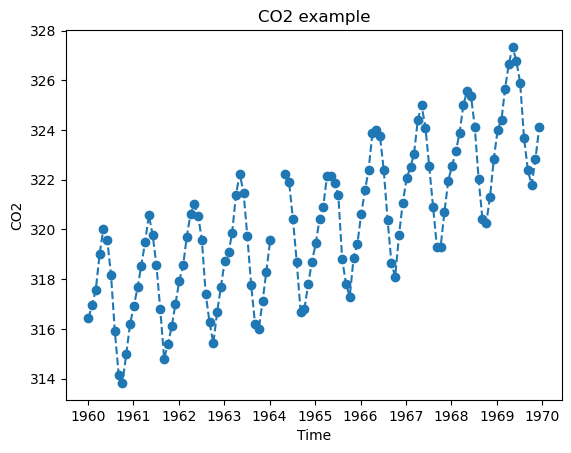

In [177]:
plt.style.use('default')
fig, ax = plt.subplots()
ax.plot(sixties.index, sixties.co2, marker='o', linestyle='--')
ax.set_xlabel('Time')
ax.set_ylabel('CO2')
ax.set_title('CO2 example')
plt.show()

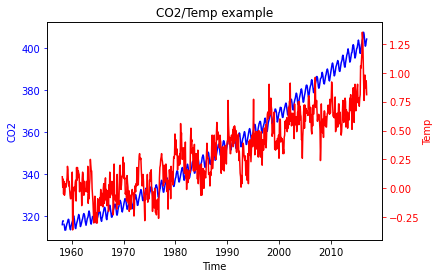

In [50]:
fig, ax = plt.subplots()
ax.plot(df.index, df.co2, color='blue')
ax.set_xlabel('Time')
ax.set_ylabel('CO2', color='blue')
ax.set_title('CO2/Temp example')
ax.tick_params('y', colors='blue')

ax2 = ax.twinx()
ax2.plot(df.index, df.relative_temp, color='red')
ax2.set_ylabel('Temp', color='red')
ax2.tick_params('y', colors='red')

plt.show()

In [59]:
def plot_timeseries(axes, x, y, color, xlabel, ylabel):
    axes.plot(x, y, color=color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel, color=color)
    axes.tick_params('y', colors=color)

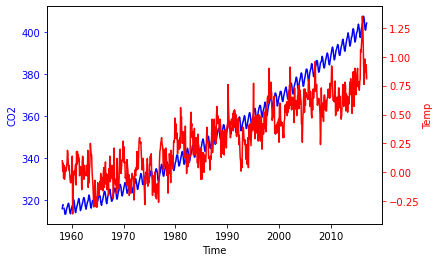

In [61]:
fig, ax = plt.subplots()
plot_timeseries(ax, df.index, df.co2, 'blue', 'Time', 'CO2')

ax2 = ax.twinx()
plot_timeseries(ax2, df.index, df.relative_temp, 'red', 'Time', 'Temp')

plt.show()

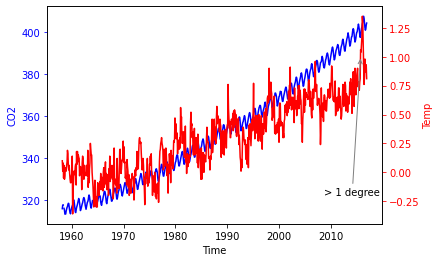

In [72]:
fig, ax = plt.subplots()
plot_timeseries(ax, df.index, df.co2, 'blue', 'Time', 'CO2')

ax2 = ax.twinx()
plot_timeseries(ax2, df.index, df.relative_temp, 'red', 'Time', 'Temp')

ax2.annotate('> 1 degree', xy=(pd.Timestamp('2015-10-06'), 1),
            xytext=(pd.Timestamp('2008-10-06'), -0.2),
            arrowprops={"arrowstyle":"->", "color":"grey"})

plt.show()

In [74]:
df_medals = pd.read_csv('medals_by_country_2016.csv', index_col=0) #index_col is the country name
df_medals

,Bronze,Gold,Silver
United States,67,137,52
Germany,67,47,43
Great Britain,26,64,55
Russia,35,50,28
China,35,44,30
France,21,20,55
Australia,25,23,34
Italy,24,8,38
Canada,61,4,4
Japan,34,17,13


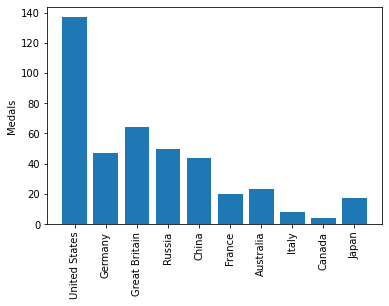

In [79]:
fig, ax = plt.subplots()
ax.bar(df_medals.index, df_medals['Gold'])

ax.set_xticklabels(df_medals.index, rotation=90)
ax.set_ylabel('Medals')

plt.show()

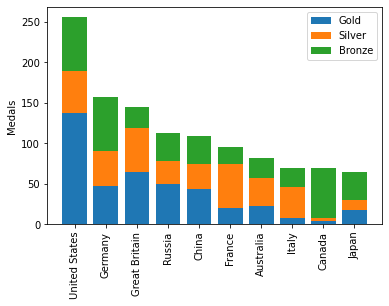

In [83]:
fig, ax = plt.subplots()
ax.bar(df_medals.index, df_medals['Gold'], label='Gold')

ax.bar(df_medals.index, df_medals['Silver'], bottom=df_medals['Gold'], label='Silver')
ax.bar(df_medals.index, df_medals['Bronze'], bottom=df_medals['Gold'] + df_medals['Silver'], label='Bronze')

ax.set_xticklabels(df_medals.index, rotation=90)
ax.set_ylabel('Medals')

ax.legend()
plt.show()

In [94]:
df_medals2 = pd.read_csv('summer2016.csv', index_col=0) #index_col is the country name
df_medals2.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
161,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
175,73,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver
450,250,Saeid Morad Abdevali,M,26.0,170.0,80.0,Iran,IRI,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Bronze
794,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver


In [95]:
df_rowing = df_medals2.loc[df_medals2['Sport'] == 'Rowing']
df_gymnastics = df_medals2.loc[df_medals2['Sport'] == 'Gymnastics']

Text(0, 0.5, 'Height')

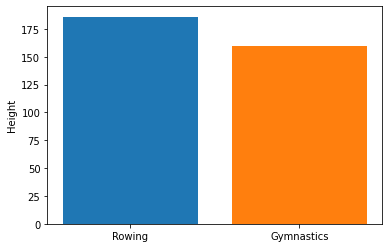

In [97]:
fig, ax = plt.subplots()

ax.bar('Rowing', df_rowing['Height'].mean())
ax.bar('Gymnastics', df_gymnastics['Height'].mean())

ax.set_ylabel('Height')

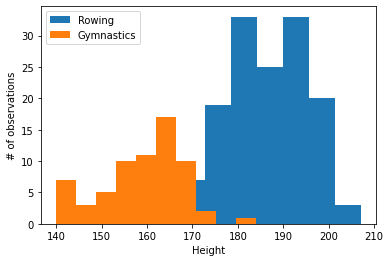

In [103]:
fig, ax = plt.subplots()

ax.hist(df_rowing['Height'], label='Rowing')
ax.hist(df_gymnastics['Height'], label='Gymnastics')

ax.set_xlabel('Height')
ax.set_ylabel('# of observations')

ax.legend()

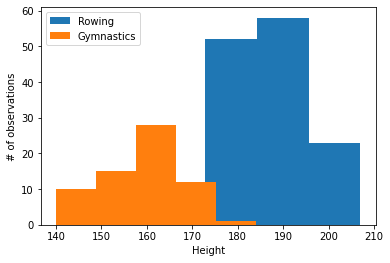

In [104]:
fig, ax = plt.subplots()

ax.hist(df_rowing['Height'], label='Rowing', bins=5)
ax.hist(df_gymnastics['Height'], label='Gymnastics', bins=5)

ax.set_xlabel('Height')
ax.set_ylabel('# of observations')

ax.legend()

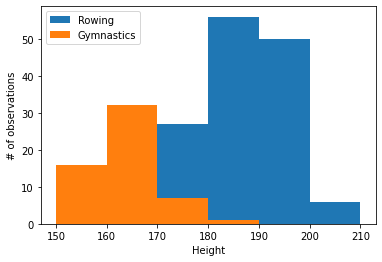

In [105]:
fig, ax = plt.subplots()

ax.hist(df_rowing['Height'], label='Rowing', bins=[150, 160, 170, 180, 190, 200, 210])
ax.hist(df_gymnastics['Height'], label='Gymnastics', bins=[150, 160, 170, 180, 190, 200, 210])

ax.set_xlabel('Height')
ax.set_ylabel('# of observations')

ax.legend()

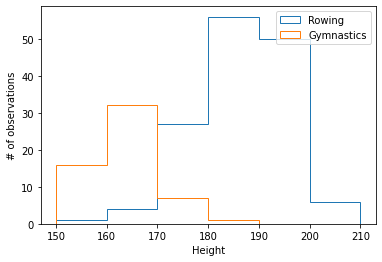

In [106]:
fig, ax = plt.subplots()

ax.hist(df_rowing['Height'], label='Rowing', bins=[150, 160, 170, 180, 190, 200, 210],
       histtype='step')
ax.hist(df_gymnastics['Height'], label='Gymnastics', bins=[150, 160, 170, 180, 190, 200, 210],
       histtype='step')

ax.set_xlabel('Height')
ax.set_ylabel('# of observations')

ax.legend()

Text(0, 0.5, 'Height')

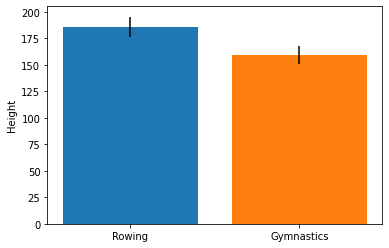

In [110]:
fig, ax = plt.subplots()

ax.bar('Rowing', df_rowing['Height'].mean(), yerr=df_rowing['Height'].std())
ax.bar('Gymnastics', df_gymnastics['Height'].mean(), yerr=df_gymnastics['Height'].std())

ax.set_ylabel('Height')

C:\Users\Andriy\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Height')

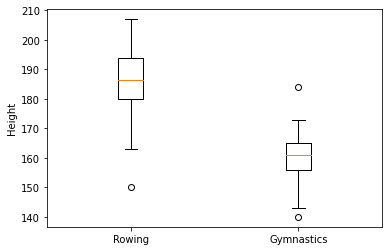

In [113]:
fig, ax = plt.subplots()

ax.boxplot([df_rowing['Height'], df_gymnastics['Height']])

ax.set_xticklabels(['Rowing', 'Gymnastics'])
ax.set_ylabel('Height')

Text(0, 0.5, 'Temp')

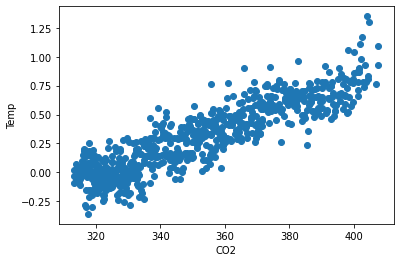

In [115]:
fig, ax = plt.subplots()
ax.scatter(df['co2'], df['relative_temp'])
ax.set_xlabel('CO2')
ax.set_ylabel('Temp')

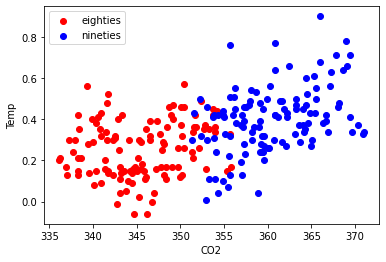

In [117]:
eighties = df["1980-01-01":"1989-12-31"]
nineties = df["1990-01-01":"1999-12-31"]

fig, ax = plt.subplots()
ax.scatter(eighties['co2'], eighties['relative_temp'], color='red', label='eighties')
ax.scatter(nineties['co2'], nineties['relative_temp'], color='blue', label='nineties')

ax.set_xlabel('CO2')
ax.set_ylabel('Temp')

ax.legend()

Text(0, 0.5, 'Temp')

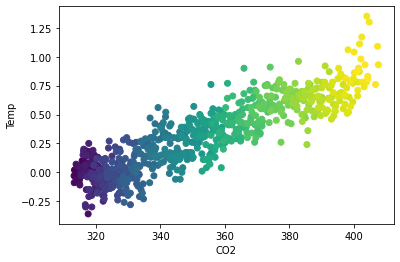

In [122]:
fig, ax = plt.subplots()
ax.scatter(df['co2'], df['relative_temp'], c=df.index) # 'c' takes df.index which is date and color points accordingly

ax.set_xlabel('CO2')
ax.set_ylabel('Temp')

# time of the measurement is encoded in the brightness of the color applied to the points
# dark colors represent early daytes and become brighter over time

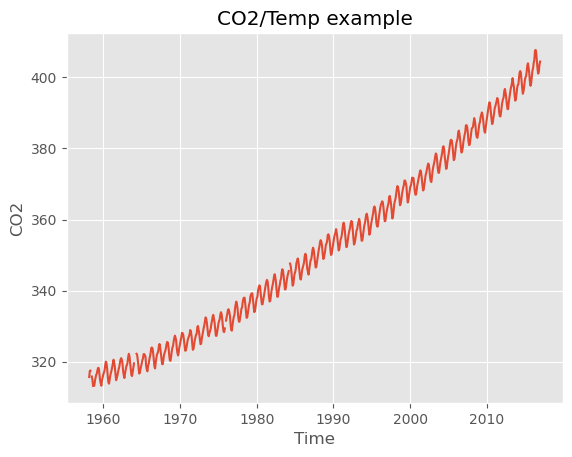

In [143]:
plt.style.use('ggplot')
fig, ax = plt.subplots()

ax.plot(df.index, df.co2)
ax.set_xlabel('Time')
ax.set_ylabel('CO2')
ax.set_title('CO2/Temp example')
ax.tick_params('y')

plt.show()

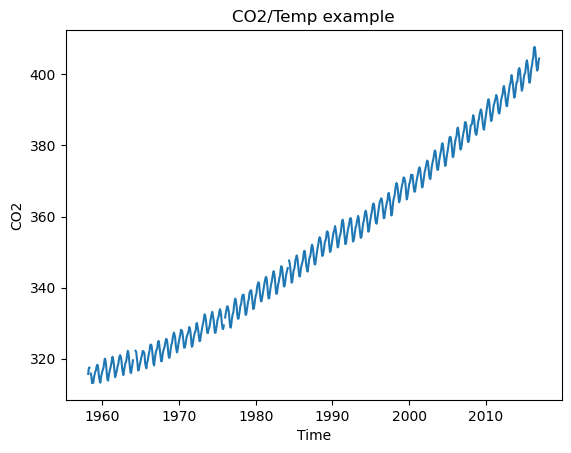

In [142]:
plt.style.use('default')
fig, ax = plt.subplots()

ax.plot(df.index, df.co2)
ax.set_xlabel('Time')
ax.set_ylabel('CO2')
ax.set_title('CO2/Temp example')
ax.tick_params('y')

plt.show()

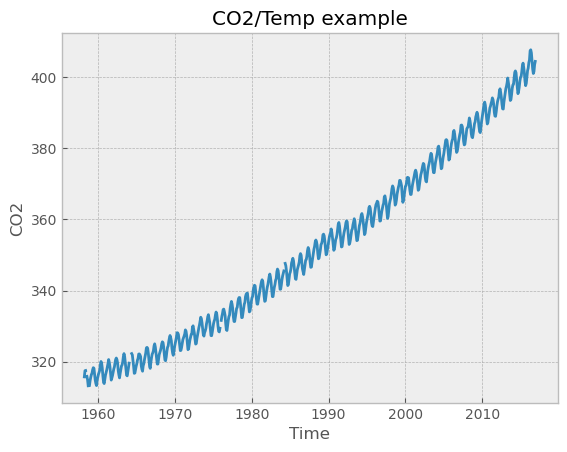

In [144]:
plt.style.use('bmh')
fig, ax = plt.subplots()

ax.plot(df.index, df.co2)
ax.set_xlabel('Time')
ax.set_ylabel('CO2')
ax.set_title('CO2/Temp example')
ax.tick_params('y')

plt.show()

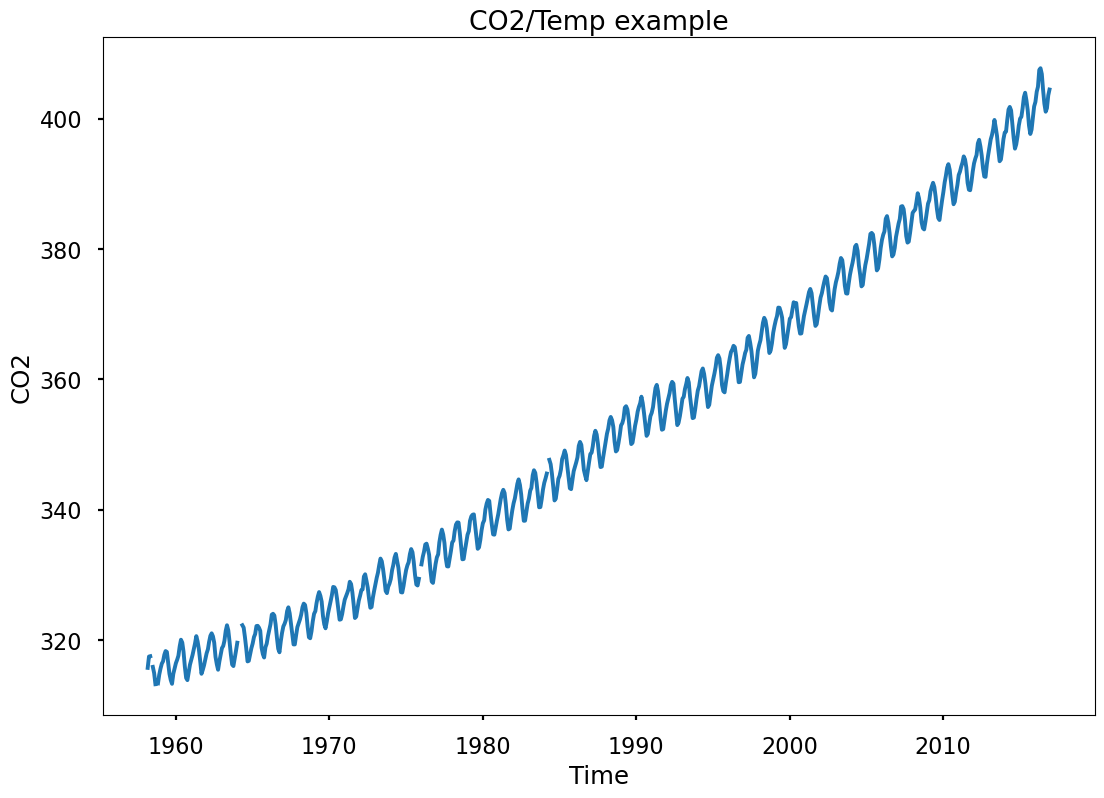

In [139]:
plt.style.use('seaborn-poster')
fig, ax = plt.subplots()

ax.plot(df.index, df.co2)
ax.set_xlabel('Time')
ax.set_ylabel('CO2')
ax.set_title('CO2/Temp example')
ax.tick_params('y')

plt.show()

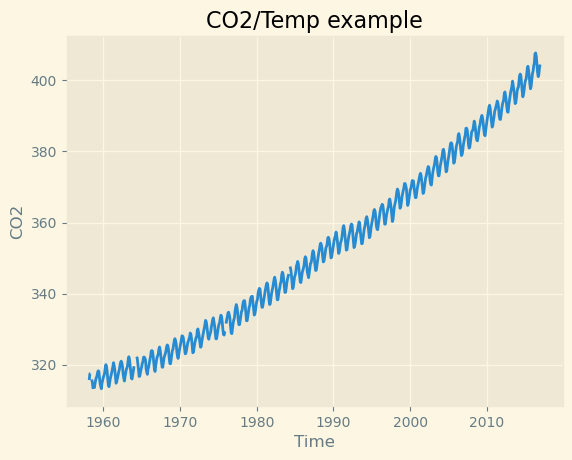

In [145]:
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots()

ax.plot(df.index, df.co2)
ax.set_xlabel('Time')
ax.set_ylabel('CO2')
ax.set_title('CO2/Temp example')
ax.tick_params('y')

plt.show()

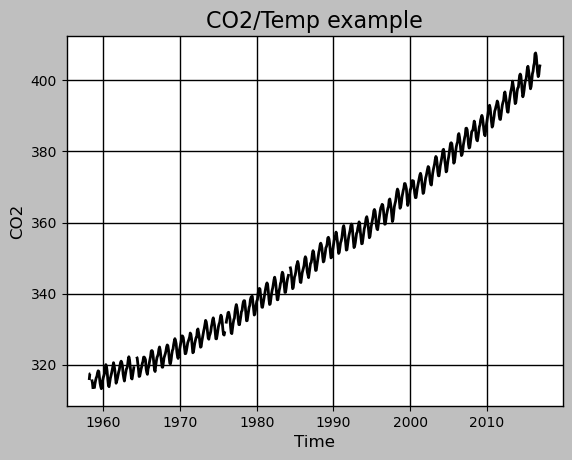

In [147]:
plt.style.use('grayscale')
fig, ax = plt.subplots()

ax.plot(df.index, df.co2)
ax.set_xlabel('Time')
ax.set_ylabel('CO2')
ax.set_title('CO2/Temp example')
ax.tick_params('y')

plt.show()

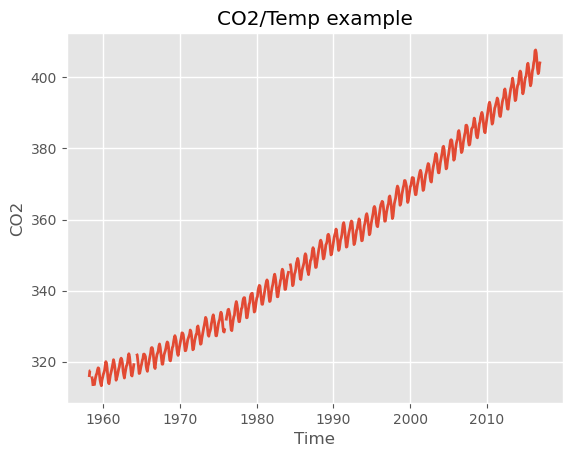

In [155]:
plt.style.use('ggplot')
fig, ax = plt.subplots()

ax.plot(df.index, df.co2)
ax.set_xlabel('Time')
ax.set_ylabel('CO2')
ax.set_title('CO2/Temp example')
ax.tick_params('y')

fig.savefig('co2_temp.png')
fig.savefig('co2_temp.jpg')
fig.savefig('co2_temp2.jpg', quality=50) # from 1 to 100
fig.savefig('co2_temp.svg') #vector image
fig.savefig('co2_temp2.png', dpi=300)

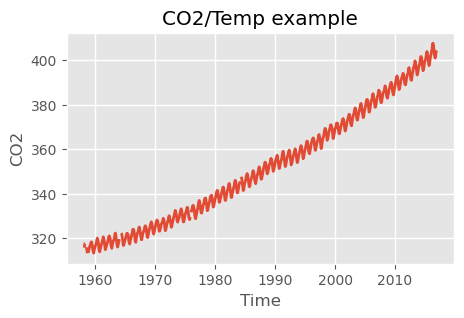

In [158]:
plt.style.use('ggplot')
fig, ax = plt.subplots()

ax.plot(df.index, df.co2)
ax.set_xlabel('Time')
ax.set_ylabel('CO2')
ax.set_title('CO2/Temp example')
ax.tick_params('y')

fig.set_size_inches([5, 3]) # 5 is width, 3 is height

In [171]:
df_medals2.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
161,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
175,73,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver
450,250,Saeid Morad Abdevali,M,26.0,170.0,80.0,Iran,IRI,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Bronze
794,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver


In [172]:
sports = df_medals2["Sport"].unique()
sports

array(['Rowing', 'Taekwondo', 'Handball', 'Wrestling', 'Gymnastics',
       'Swimming', 'Basketball', 'Boxing', 'Volleyball', 'Athletics',
       'Rugby Sevens', 'Judo', 'Rhythmic Gymnastics', 'Weightlifting',
       'Equestrianism', 'Badminton', 'Water Polo', 'Football', 'Fencing',
       'Shooting', 'Sailing', 'Beach Volleyball', 'Canoeing', 'Hockey',
       'Cycling', 'Tennis', 'Diving', 'Table Tennis', 'Triathlon',
       'Archery', 'Synchronized Swimming', 'Modern Pentathlon',
       'Trampolining', 'Golf'], dtype=object)

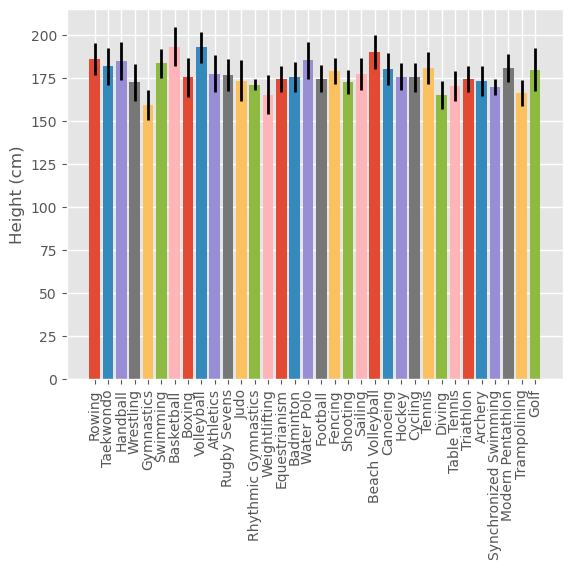

In [174]:
fig, ax = plt.subplots()

for sport in sports:
    sport_df = df_medals2[df_medals2["Sport"] == sport]
    ax.bar(sport, sport_df["Height"].mean(),
           yerr=sport_df["Height"].std())
ax.set_ylabel("Height (cm)")
ax.set_xticklabels(sports, rotation=90)
plt.show()
